In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("diabetes.csv")
df.info()
df.shape
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [3]:
print(df.isnull().sum())
print()
print(df.nunique())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


<Figure size 640x480 with 0 Axes>

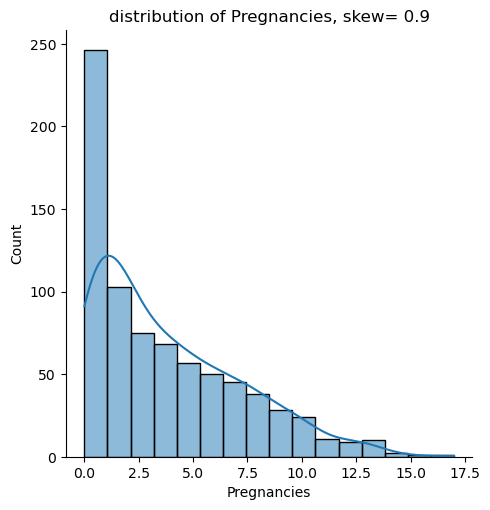

<Figure size 640x480 with 0 Axes>

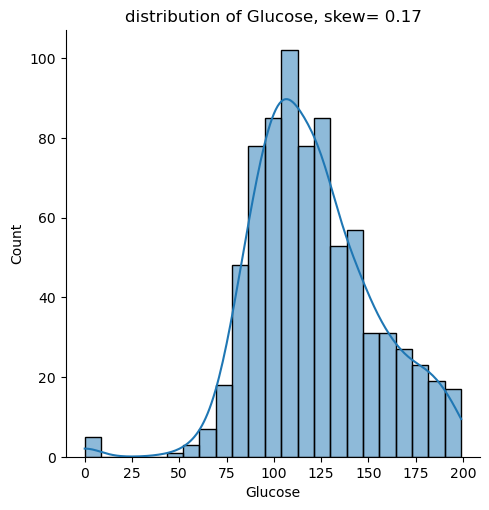

<Figure size 640x480 with 0 Axes>

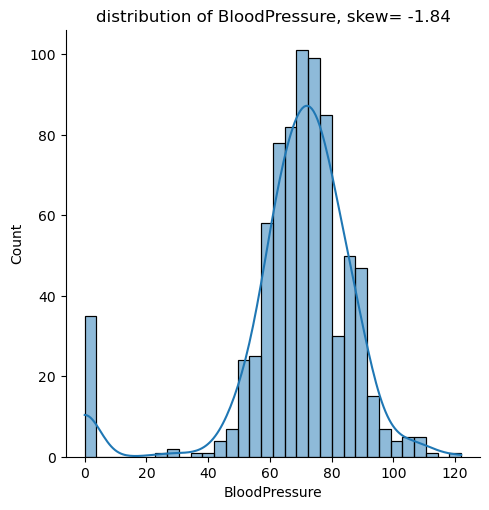

<Figure size 640x480 with 0 Axes>

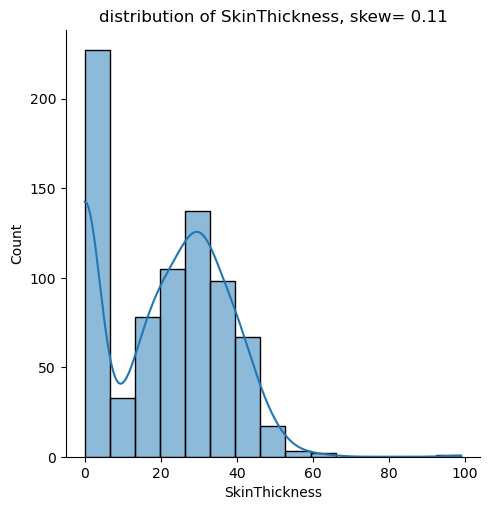

<Figure size 640x480 with 0 Axes>

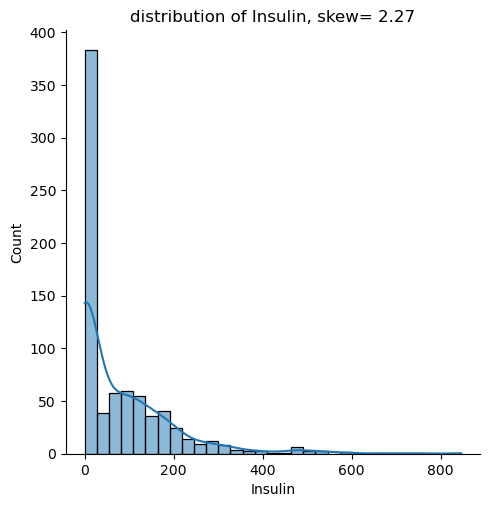

<Figure size 640x480 with 0 Axes>

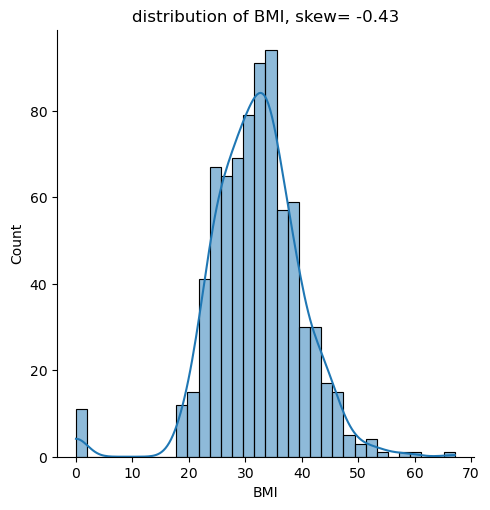

<Figure size 640x480 with 0 Axes>

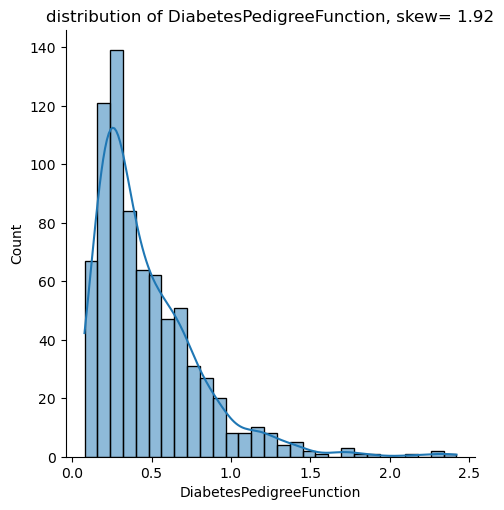

<Figure size 640x480 with 0 Axes>

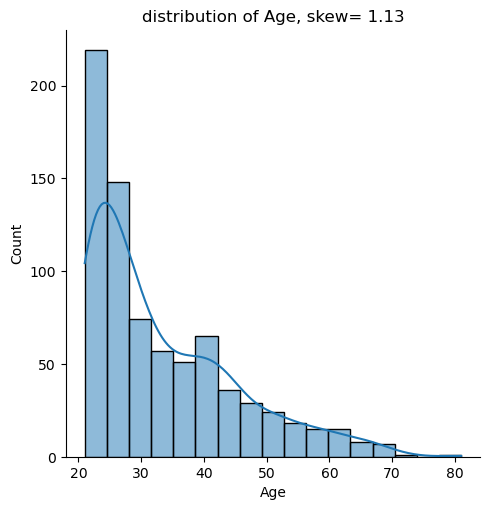

In [7]:
for i in df.columns[0:8]:
    plt.figure()
    skewness= round(df[i].skew(),2)
    sns.displot(df[i],kde=True)
    plt.title(f"distribution of {i}, skew= {skewness}")

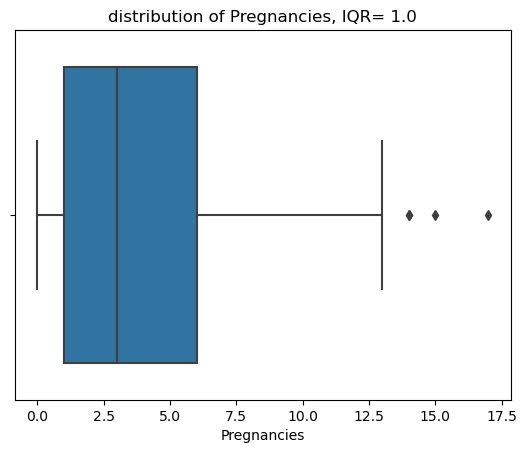

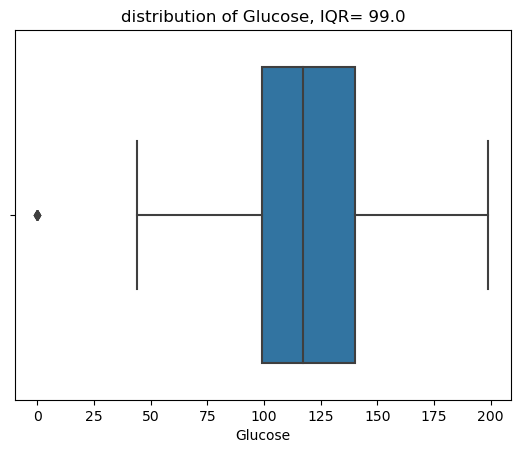

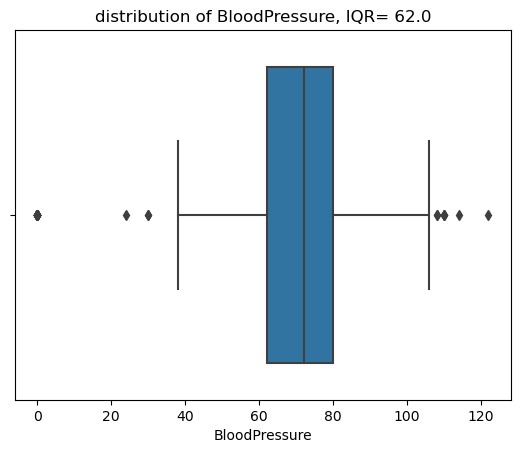

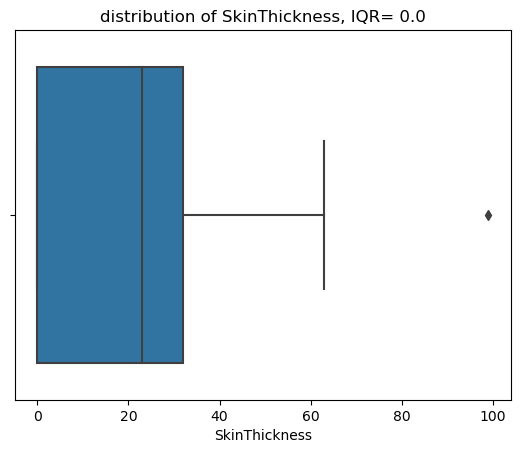

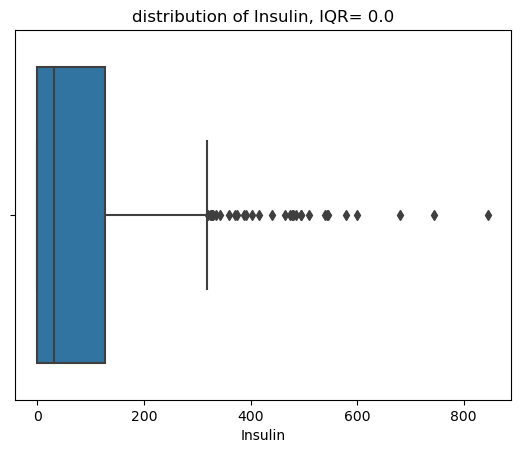

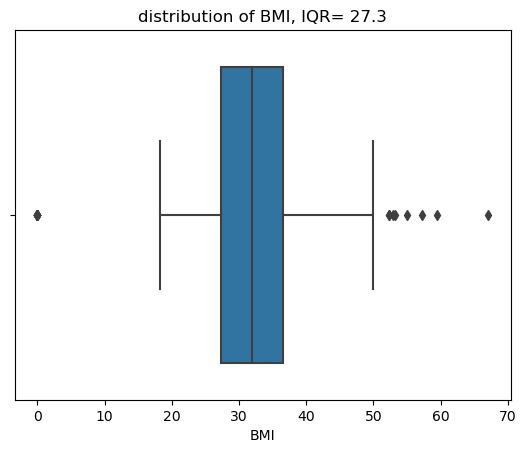

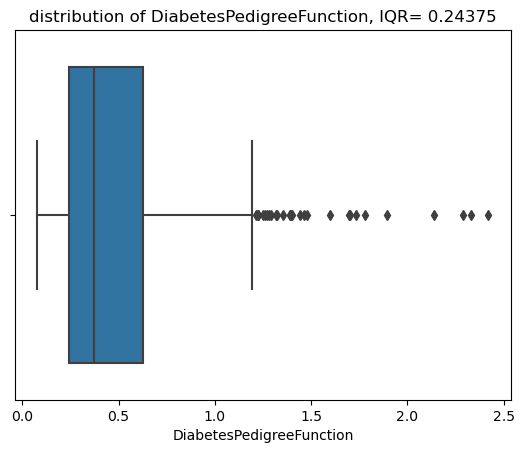

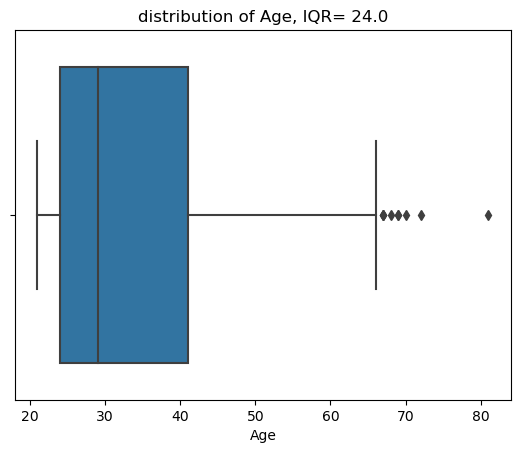

In [10]:
for i in df.columns[0:8]:
    plt.figure()
    Q3= df[i].quantile(0.75)
    Q1= df[i].quantile(0.25)
    IQR= Q3=Q1
    sns.boxplot(df[i])
    plt.title(f"distribution of {i}, IQR= {IQR}")

<Figure size 640x480 with 0 Axes>

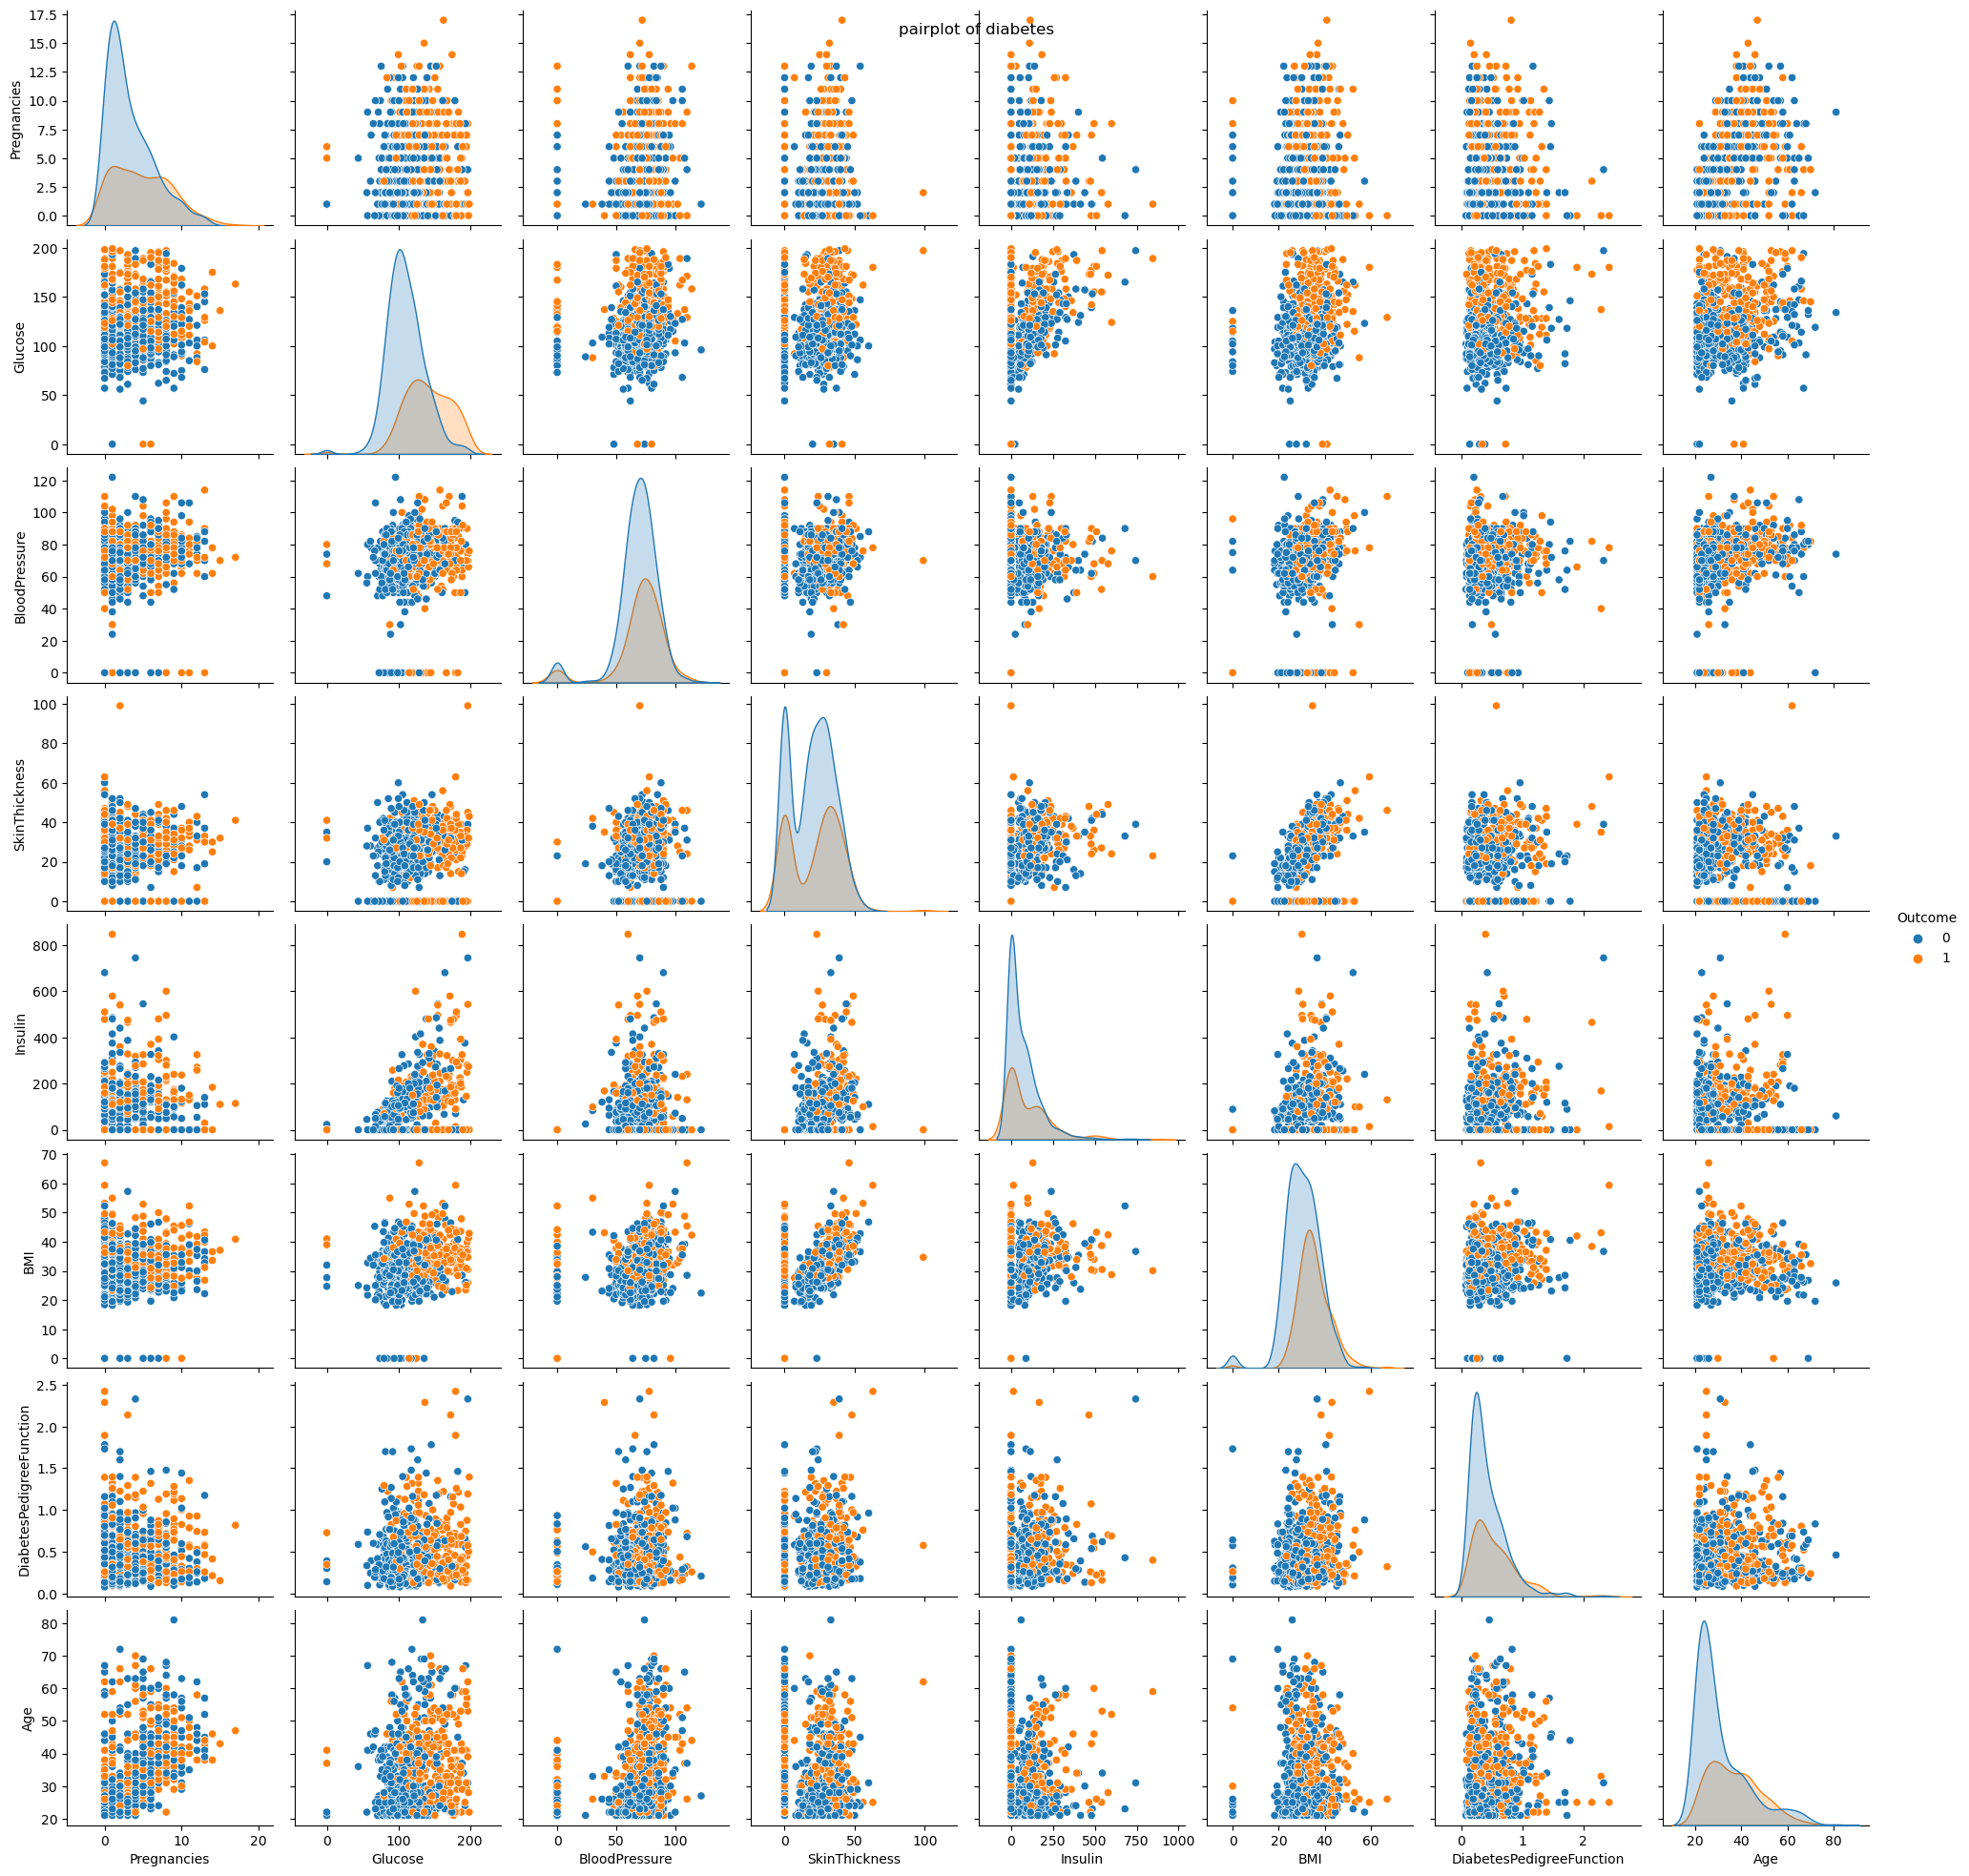

In [12]:
plt.figure()
sns.pairplot(df, hue="Outcome")
plt.suptitle("pairplot of diabetes")
plt.show()

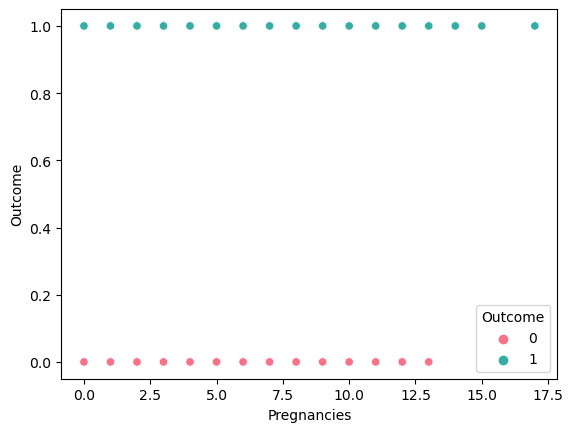

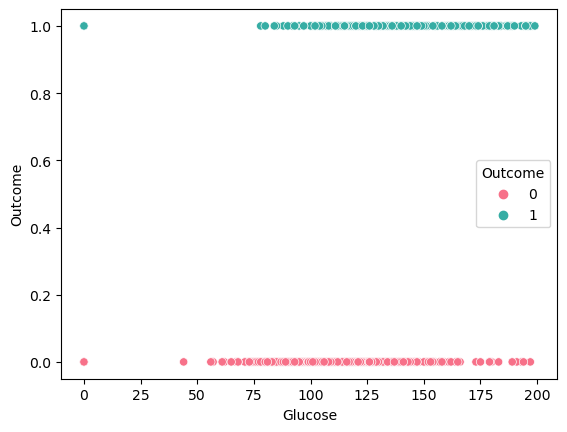

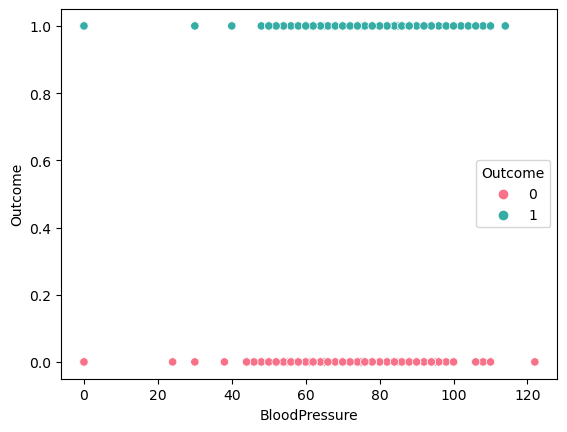

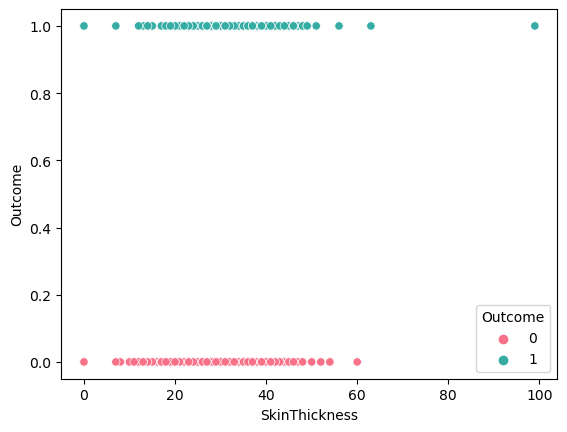

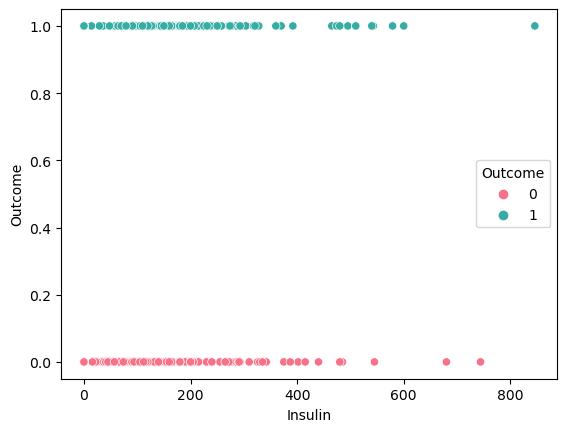

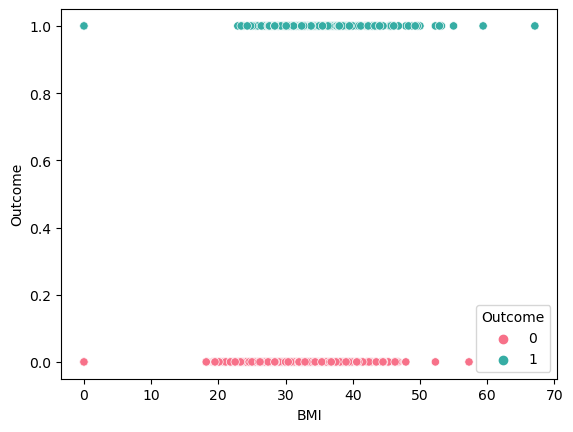

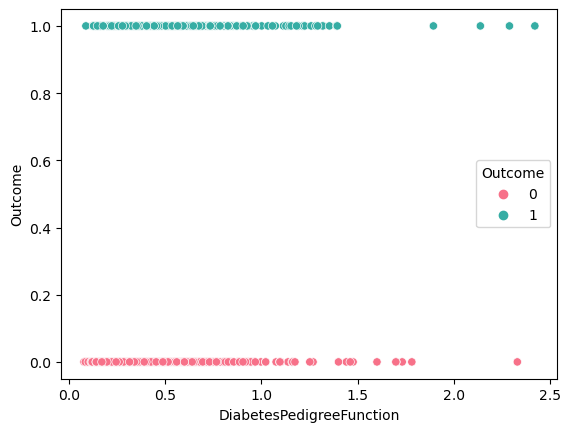

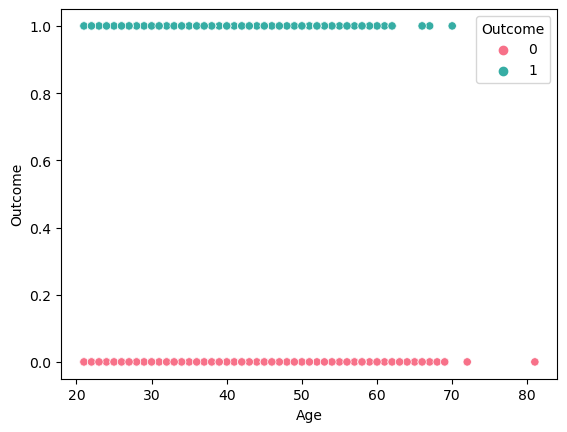

In [15]:
for i in df.columns[0:8]:
    plt.figure()
    sns.scatterplot(x= df[i],y=df["Outcome"], hue="Outcome", data=df,palette="husl")

In [38]:
from scipy.stats import f_oneway

for i in df.columns[0:8]:
    group1= df[df["Outcome"]==0][i]
    group2= df[df["Outcome"]==1][i]
    result= f_oneway(group1, group2)
    formatted_p="{:3f}".format(result.pvalue)
    print(f"{i}, F Score: {result.statistic:.3f}, P-Value:{formatted_p}")

Pregnancies, F Score: 39.670, P-Value:0.000000
Glucose, F Score: 213.162, P-Value:0.000000
BloodPressure, F Score: 3.257, P-Value:0.071514
SkinThickness, F Score: 4.304, P-Value:0.038348
Insulin, F Score: 13.281, P-Value:0.000286
BMI, F Score: 71.772, P-Value:0.000000
DiabetesPedigreeFunction, F Score: 23.871, P-Value:0.000001
Age, F Score: 46.141, P-Value:0.000000


<AxesSubplot:>

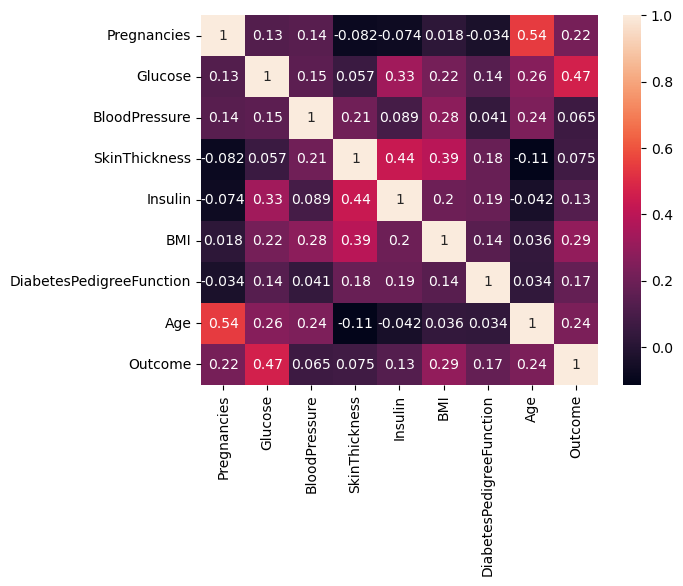

In [42]:
sns.heatmap(df.corr(),annot=True)
#I'd like to odrop the blood pressure and diabetespedigreefunction